In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

In [3]:
df = load_iris()

In [4]:
X = df.data
Y= df.target

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.utils import to_categorical

In [23]:
Y = to_categorical(Y)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [26]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),Dropout(0.3),Dense(8, activation='relu'),Dropout(0.3),Dense(3, activation='softmax')
])

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience=20,
    restore_best_weights = True
)

In [29]:
history = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3151 - loss: 1.3938 - val_accuracy: 0.2917 - val_loss: 1.3594
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3581 - loss: 1.3805 - val_accuracy: 0.2917 - val_loss: 1.3307
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3607 - loss: 1.3066 - val_accuracy: 0.2917 - val_loss: 1.3067
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3294 - loss: 1.3293 - val_accuracy: 0.2917 - val_loss: 1.2842
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3034 - loss: 1.2123 - val_accuracy: 0.2917 - val_loss: 1.2649
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4258 - loss: 1.1560 - val_accuracy: 0.2917 - val_loss: 1.2475
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3177 - loss: 1.3258 - val_accuracy: 0.2917 - val_loss: 1.2298
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3138 - loss: 1.2493 - val_accuracy: 0.2917 - val_loss: 1.2136

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

In [34]:
print('Test Loss: ', test_loss)

Test Loss:  0.6182636022567749


In [35]:
print('Accuracy: ', test_accuracy)

Accuracy:  0.6333333253860474


In [39]:
Y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [44]:
Y_pred_classes = np.argmax(Y_pred, axis=1)

In [45]:
Y_test_classes = np.argmax(Y_test, axis=1)

In [47]:
CM = confusion_matrix(Y_test_classes, Y_pred_classes)

In [48]:
from sklearn.model_selection import LearningCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

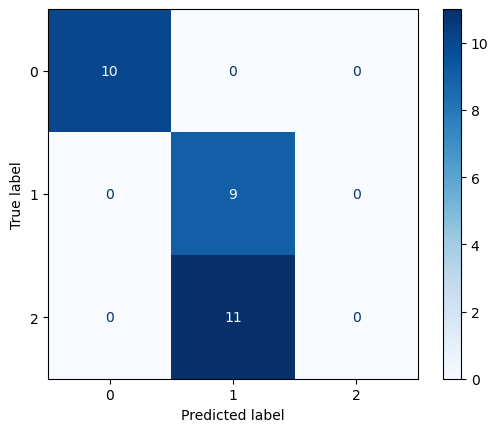

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM)
disp.plot(cmap='Blues')

In [51]:
print(classification_report(Y_test_classes, Y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.45      1.00      0.62         9
           2       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


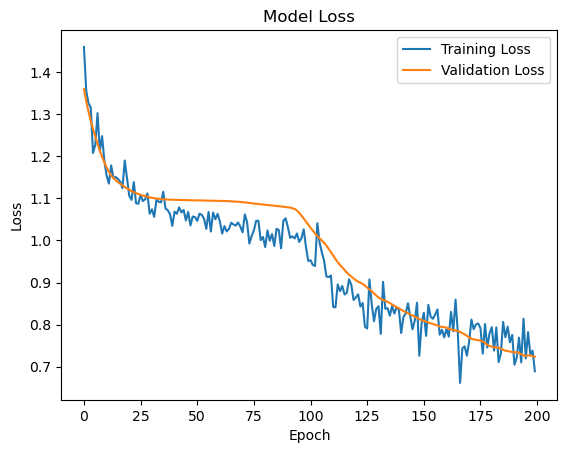

In [56]:
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

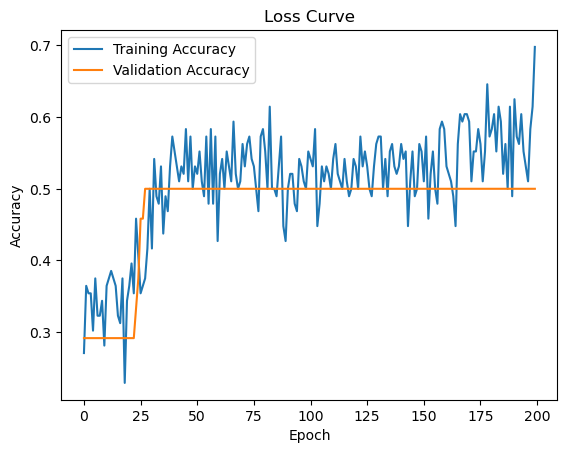

In [57]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()